## Dimension Reduction

Multicollinearity 


Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other.

In [20]:
import pandas as pd 
import seaborn as sns

# the dataset
data = pd.read_csv('D:\code\data Science\Datasets\BMI.csv')

# printing first few rows
print(data.head())

  Gender  Height  Weight  Index
0   Male     161      89      4
1   Male     179     127      4
2   Male     172     139      5
3   Male     153     104      5
4   Male     165      68      2


VIF greater than 10 is often considered indicative of multicollinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

# the independent variables set
X = data[['Gender', 'Height', 'Weight']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

  feature        VIF
0  Gender   1.992222
1  Height  11.988796
2  Weight  10.900697


High Correlation coefficients indicates strong linear relationships

In [22]:
data.corr()

,Gender,Height,Weight,Index
Gender,1.000000,0.027034,-0.034961,-0.063925
Height,0.027034,1.000000,0.033126,-0.407796
Weight,-0.034961,0.033126,1.000000,0.801521
Index,-0.063925,-0.407796,0.801521,1.000000


<Axes: >

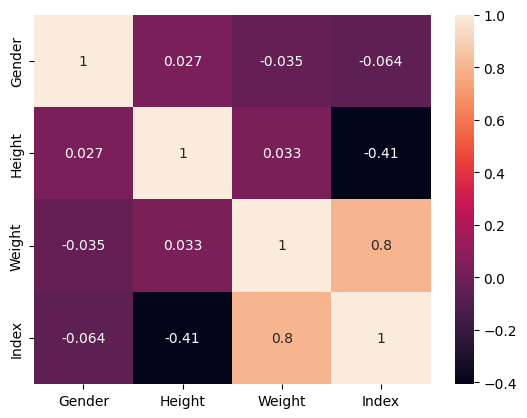

In [23]:
sns.heatmap(data=data.corr(),annot=True)

## PRINCIPAL COMPONENTS ANALYSIS

PCA can be used to transform the original correlated variables into a new set of uncorrelated variables (principal components). These principal components then serve as the predictors in your regression model.

In [24]:
from sklearn.decomposition import PCA

# applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(data)
data_new=pd.DataFrame(X_pca)

In [25]:
data_new.corr()

,0,1,2
0,1.000000e+00,7.150512e-16,4.132107e-16
1,7.150512e-16,1.000000e+00,4.050104e-15
2,4.132107e-16,4.050104e-15,1.000000e+00
